<a href="https://colab.research.google.com/github/shleppich/chto-to/blob/main/lab1IIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = np.array([[ 1.40751901, 6.15412458],
[ 2.17456159, 5.12670868],
[12.35334503,11.05834959],
[12.01047168, 7.55680772],
[ 1.95061136, 5.1244622 ],
[ 1.15554758, 5.85684231],
[ 1.15278238, 4.56623541],
[ 7.24769143, 0.72009755],
[-0.53849172, 4.78111637],
[ 8.06735018, 0.21093132],
[12.49860377,10.99444803],
[ 6.55223486, 1.38503638],
[18.79053192,18.12667407],
[ 7.90180119, 0.95221443],
[19.87386391,20.40522028],
[13.45070708, 9.69952096],
[ 8.18425517, 1.31573443],
[11.88964372, 5.54366343],
[20.65791361,18.85091047],
[13.06019899, 8.36006266],
[12.34830611, 7.71018428],
[ 6.84061163, 0.97056188],
[20.27346314,17.6708799 ],
[20.14882522,17.05323717],
[ 7.56604542, 0.77445603],
[12.7200088 , 9.75574605],
[12.93451172,10.18167917],
[ 7.67576555, 1.10446689],
[11.83875898, 8.7464605 ],
[ 2.0482083 , 5.85014107],
[ 2.72435993, 5.41878288],
[ 2.07467472, 5.21278264],
[19.59462606,16.56073109],
[19.09378716,20.89317537],
[12.31185901, 6.6036592 ],
[20.59973613,16.03546973],
[19.14681645,19.58826996],
[20.99071367,17.54618205],
[ 0.19941795, 5.78348135],
[13.07583874,10.62144968],
[ 1.30295446, 5.14279189],
[ 2.34512263, 4.94248032],
[ 7.40210521, 1.90989885],
[20.10588973,17.67682213],
[ 7.43751563, 0.51301941],
[ 7.16343405, 0.98667668],
[ 8.69183935, 0.36635981],
[18.37742043,19.52302263]])

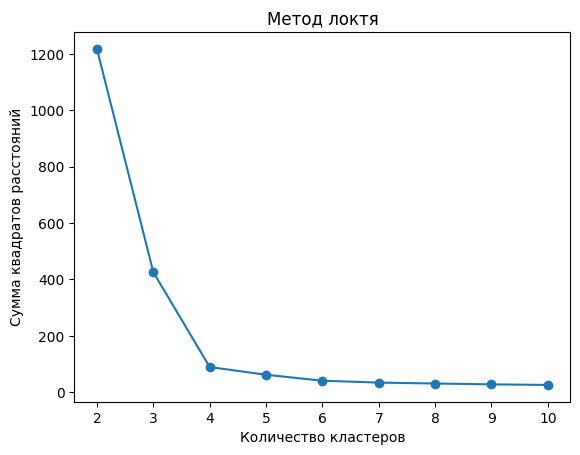

In [3]:
## 1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень кластеризации (Метод Elbow (локтя)).
# список для сохранения значений инерции (сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []
# Перебираем количество кластеров
for k in range(2, 11):
# объект KMeans с текущим количеством кластеров
  kmeans = KMeans( n_clusters = k,random_state=0)
  kmeans.fit( data )
# Сохраняем значение инерции - мерой компактности кластеров.
# Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом
  inertia_values.append( kmeans.inertia_ )
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()


Метки кластеров:
[1 1 2 2 1 1 1 3 1 3 2 3 0 3 0 2 3 2 0 2 2 3 0 0 3 2 2 3 2 1 1 1 0 0 2 0 0
 0 1 2 1 1 3 0 3 3 3 0]
Координаты центроидов кластеров:
[[19.80446562 18.32754957]
 [ 1.49977235  5.32999581]
 [12.54102114  8.90266927]
 [ 7.56088747  0.93412114]]
В кластере с меткой 0 содержится 12 точек
В кластере с меткой 1 содержится 12 точек
В кластере с меткой 2 содержится 12 точек
В кластере с меткой 3 содержится 12 точек


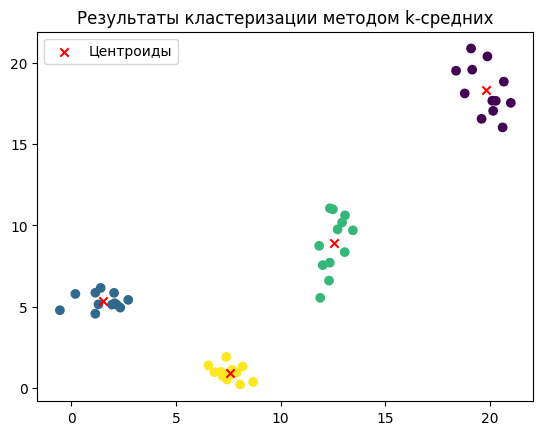

In [12]:
# 2. Выполнить кластеризацию данного множества точек методом k-средних по найденному
# кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).

# Выполнение кластеризации с найденным количеством кластеров
kmeans = KMeans( n_clusters = 4 )
# Производим кластеризацию данных
kmeans.fit( data )
# метки кластеров для каждого объекта
labels = kmeans.labels_
# координаты центроидов
centroids = kmeans.cluster_centers_
print("Метки кластеров:")
print(labels)
print("Координаты центроидов кластеров:")
print(centroids)


# 3. Напечатать:
#       - количество точек в каждом кластере
#       - координаты центроидов кластеров.
labelNum = np.unique(labels)
for v in labelNum:
  print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек"
)
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r",marker="x",label='Центроиды')
plt.title('Результаты кластеризации методом k-средних')
plt.legend()
plt.show()



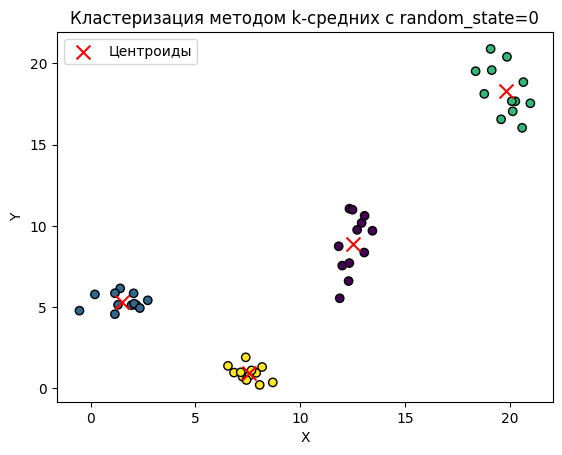

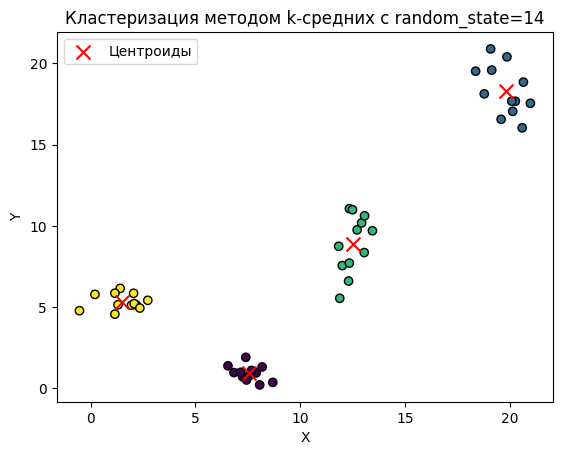

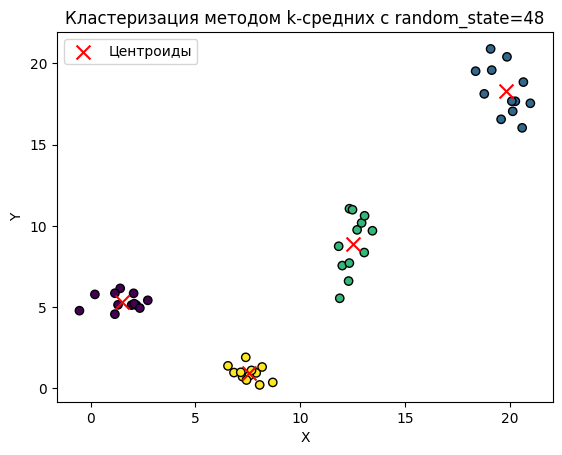

In [13]:
# 4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений
# параметра random_state
for x in [0, 14, 48]:
    kmeans = KMeans(n_clusters=4, random_state=x)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Визуализация результатов кластеризации
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Центроиды')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Кластеризация методом k-средних с random_state={x}')
    plt.legend()
    plt.show()